Name: Ahamd Aljarf

Oasis Infobyte

Batch: February 2023

Task 4: EMAIL SPAM DETECTION WITH MACHINE LEARNING


Uploading the dataset:

In [1]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


lets import the required libraries

In [2]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding = "ISO-8859-1" )

df1=df[['v1','v2']].head(2000)
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
1995,ham,Shall i come to get pickle
1996,ham,Lol boo I was hoping for a laugh
1997,ham,\YEH I AM DEF UP4 SOMETHING SAT
1998,ham,"Well, I have to leave for my class babe ... Yo..."


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm 

In [4]:
df1['v1'].value_counts() # lets check the number of ham and spam

ham     1720
spam     280
Name: v1, dtype: int64

lets split the data into testing and training sets

In [5]:
y = df1['v1'].values
X = df1["v2"].values
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 )

In [6]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [7]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., '\\YEH I AM DEF UP4 SOMETHING SAT',
       'Well, I have to leave for my class babe ... You never came back to me ... :-( ... Hope you have a nice sleep, my love',
       "LMAO where's your fish memory when I need it?"], dtype=object)

Now apply Count Vectorizer , it is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors.

In [8]:
cv = CountVectorizer()
features = cv.fit_transform(X_train)


lets train the model

In [9]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [10]:
features_test = cv.transform(X_test)



Lets make predictions

In [11]:
y_pred=model.predict(features_test)
y_pred

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       

lets now evaluate the model perfromance with another some metrics including model accuracy and confusion metrics

In [15]:
model.score(features_test,y_test)

0.965

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[340,   0],
       [ 14,  46]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


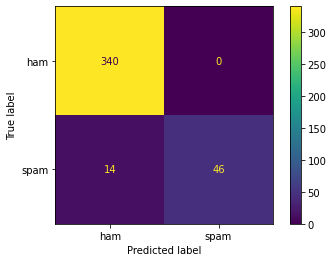

In [14]:
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, features_test,y_test)  
plt.show()